### Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Load Data

In [23]:
# Loading the dataset

sales = pd.read_csv('../data/train.csv') # train csv hold sales data. 
stores = pd.read_csv('../data/stores.csv')
features = pd.read_csv('../data/features.csv')

print('all datasets loaded sucessfully.')



all datasets loaded sucessfully.


In [24]:
# merging all data to a single master file

df = pd.merge(sales, stores, on='Store', how='left')
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315


In [25]:
df = pd.merge(df, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


### Exploratory Data Analysis

In [26]:
print('\n--- EDA : Descriptive Statistics ---')

print('Shape of the dataset (rows, columns) :\n', df.shape)
print('\nDescriptive statistics for numerical features:\n', df.describe())
print('\nNumber of unique values per column:\n', df.nunique())
print('\nMissing values per column:\n', df.isnull().sum())
print('\nData types of columns:\n', df.dtypes)



--- EDA : Descriptive Statistics ---
Shape of the dataset (rows, columns) :
 (421570, 16)

Descriptive statistics for numerical features:
                Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  150681.000000  111248.000000   
mean       60.090059       3.361027    7246.420196    3334.628621   
std        18.447931       0.45

In [27]:
## Adjusting date format 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(ascending=True, inplace=True)

# Adjusting the DataType
df['IsHoliday'] = df['IsHoliday'].astype(object)

print('\n Verifying the DataTypes after Chamge:\n')
df.dtypes


 Verifying the DataTypes after Chamge:



Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday        object
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object


--- EDA: Data Visualization ---


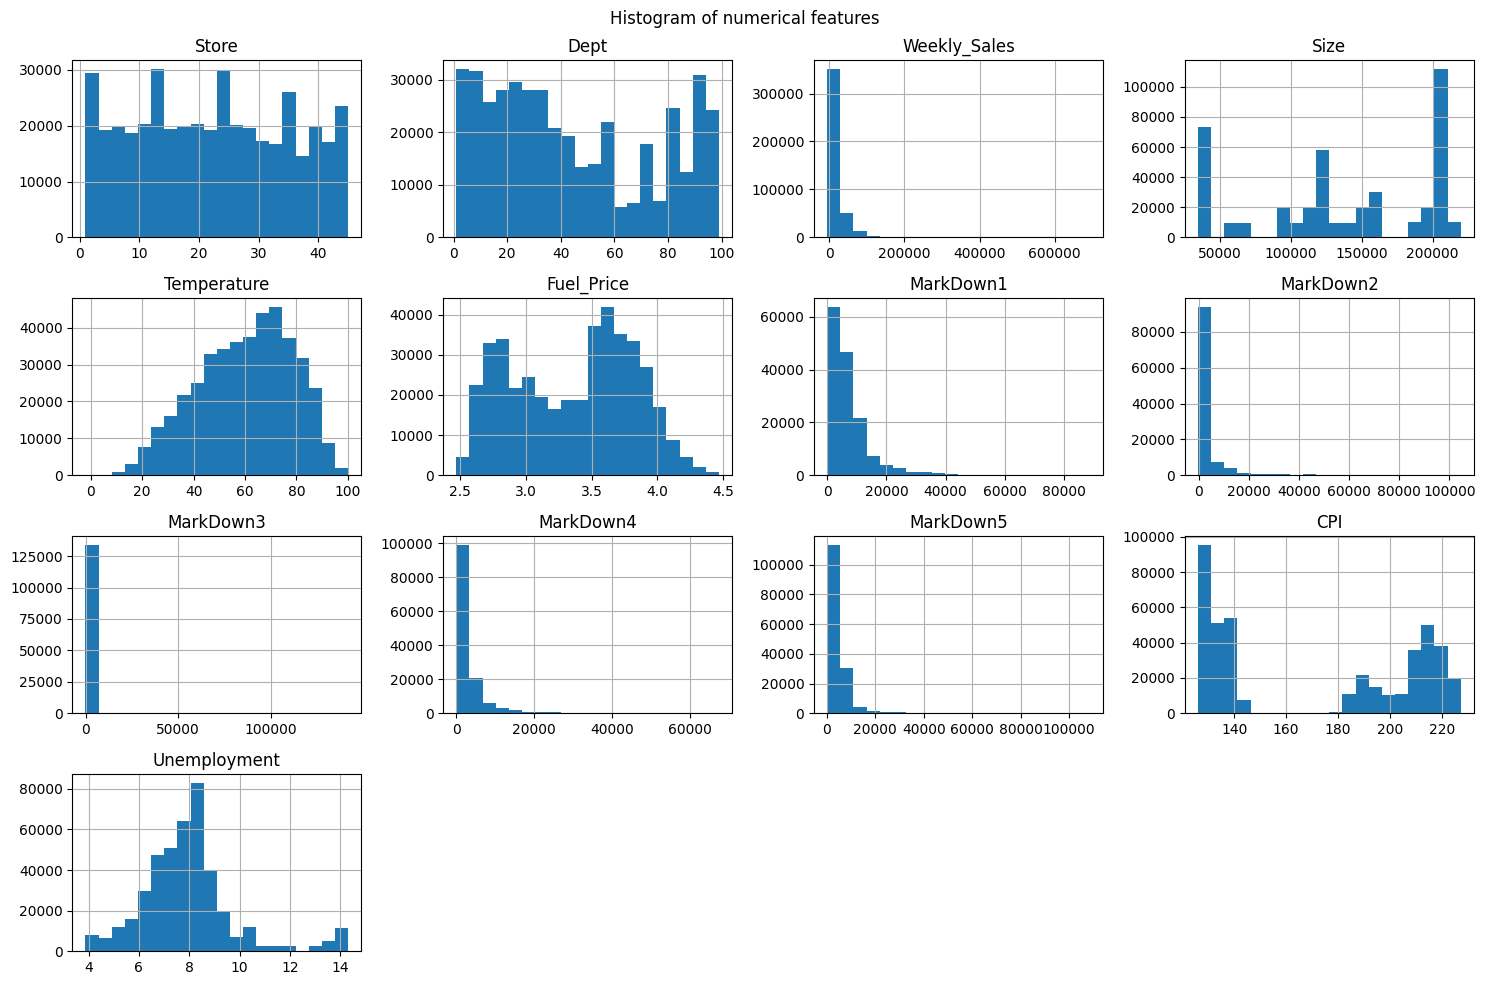

In [28]:
print("\n--- EDA: Data Visualization ---")

df.hist(bins=20, figsize=(15,10))
plt.suptitle('Histogram of numerical features')
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

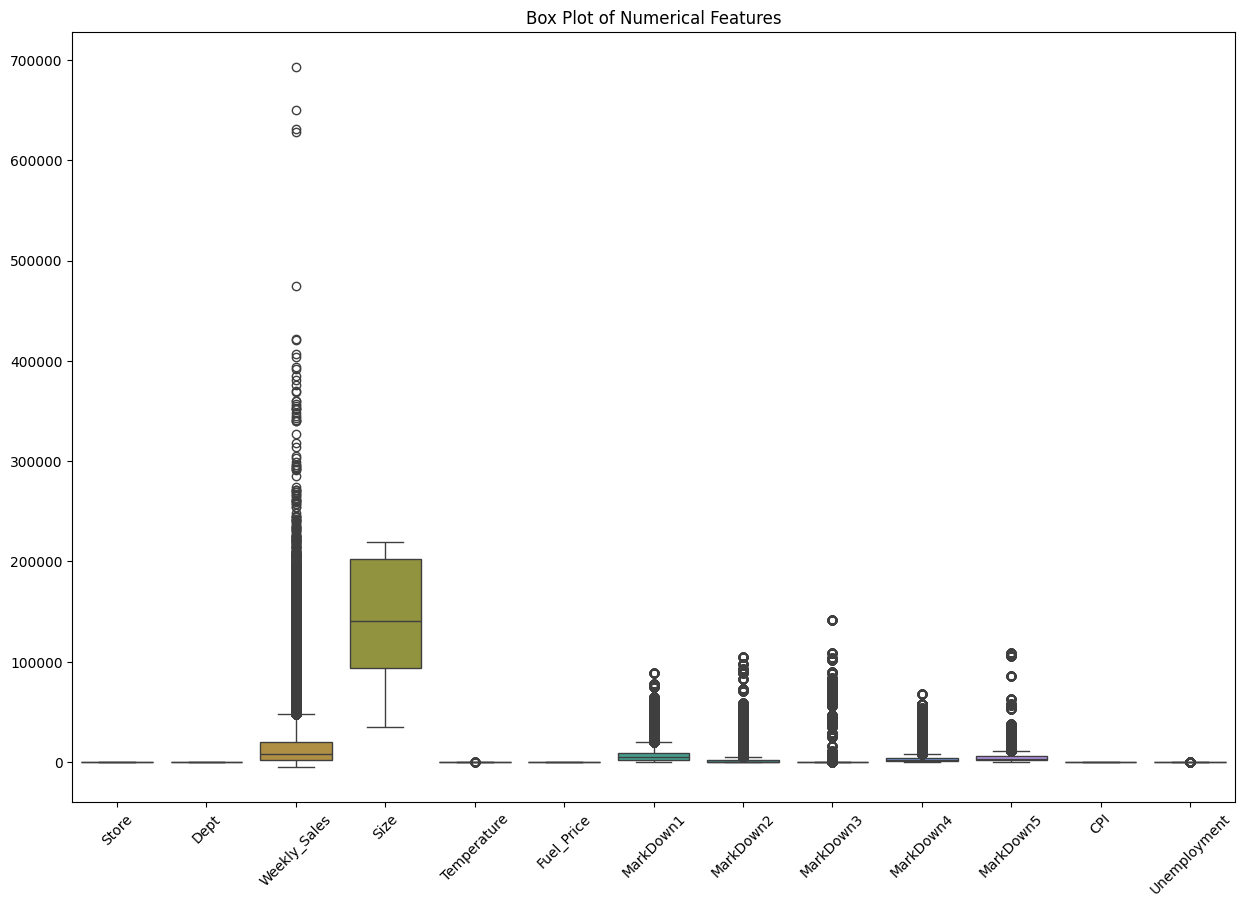

In [29]:
numerical = df.select_dtypes(['int64', 'float64'])

plt.figure(figsize=(15,10))
sns.boxplot(data=numerical)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show

In [30]:
categorical = df.select_dtypes(['object', 'bool']).columns
categorical

Index(['IsHoliday', 'Type'], dtype='object')

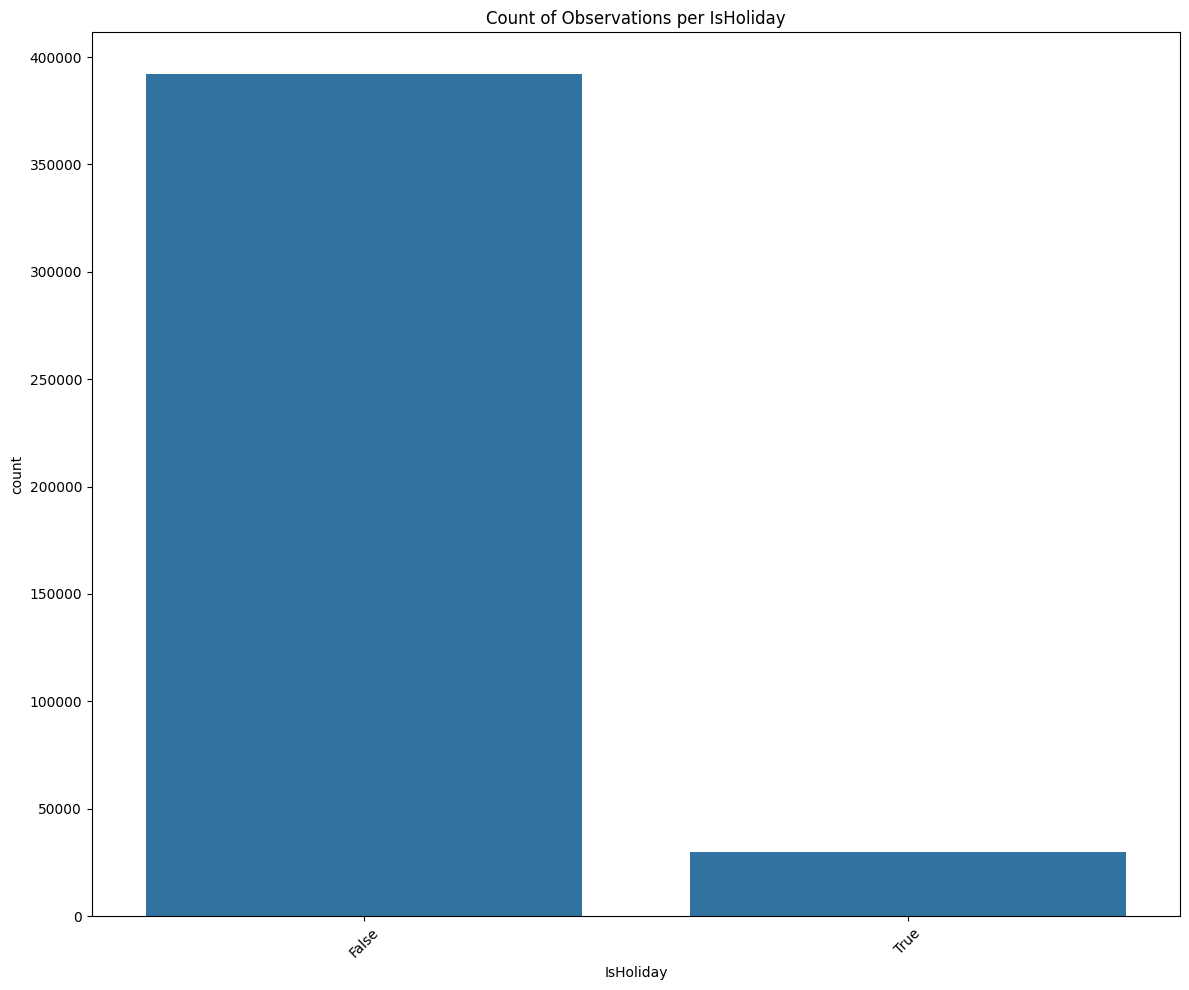

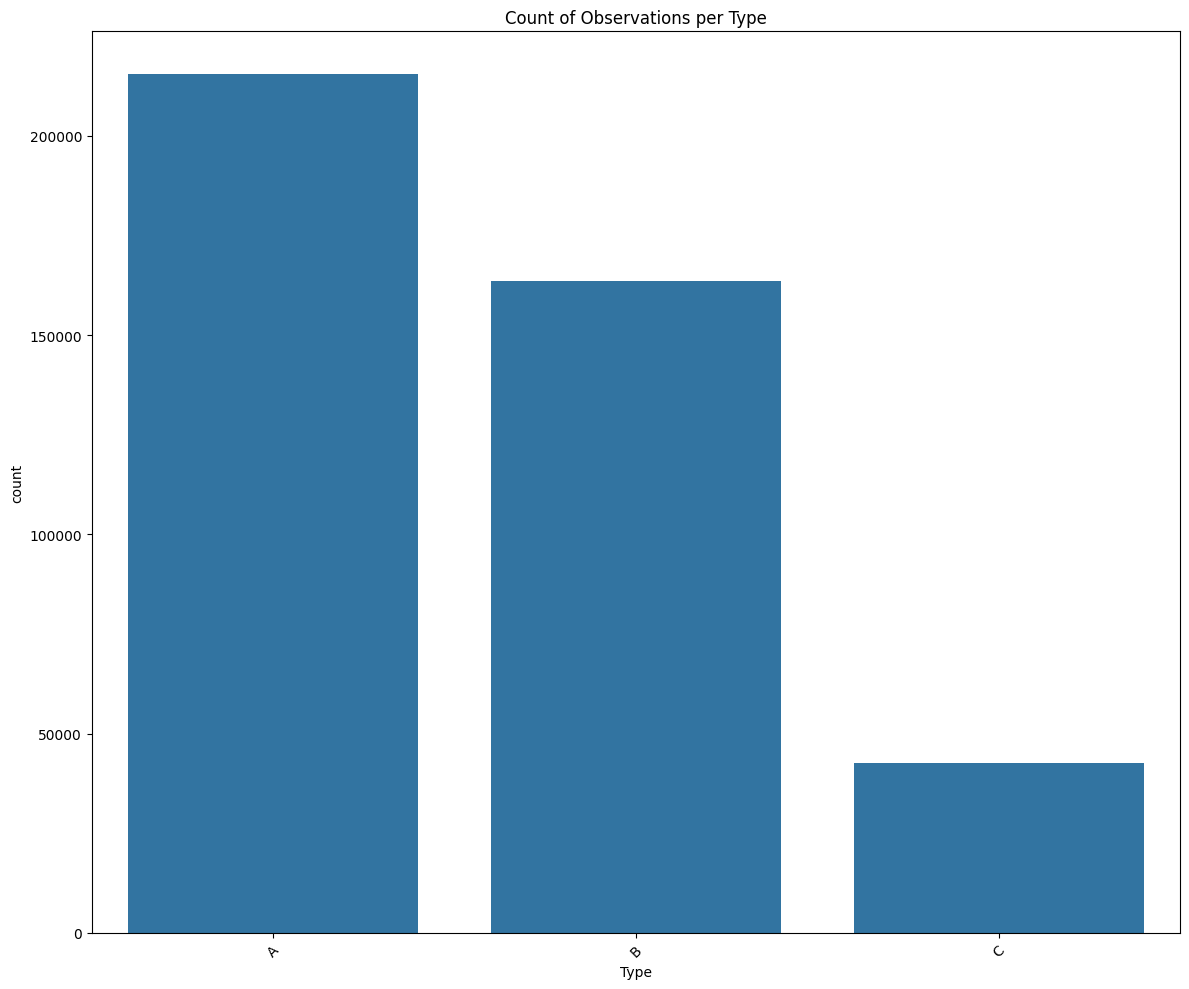

In [31]:
for column in categorical:
    plt.figure(figsize=(12,10))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Count of Observations per {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


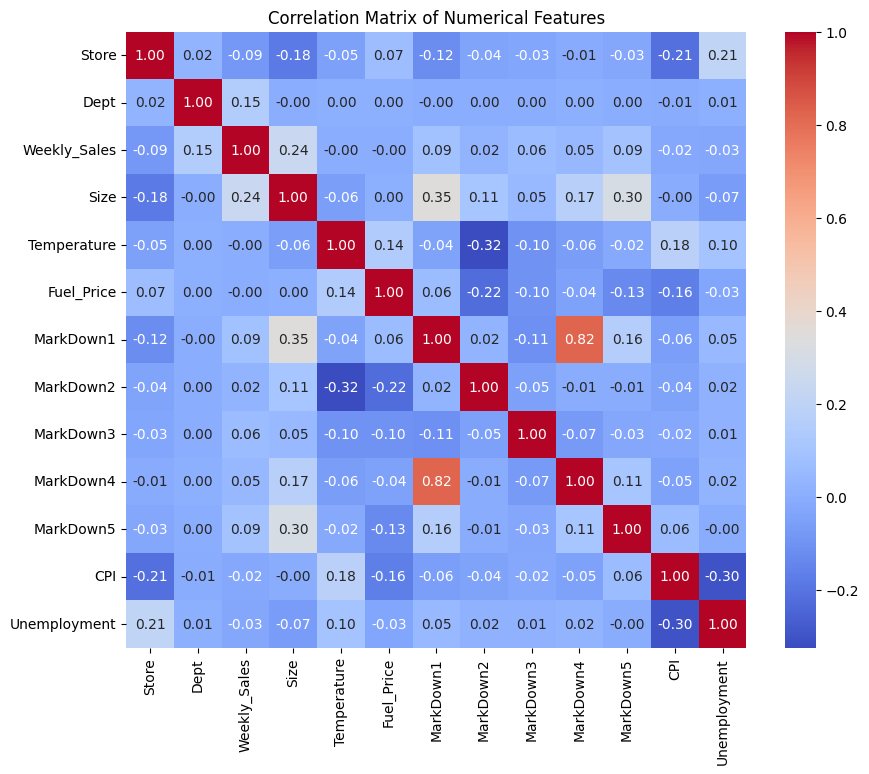

In [32]:
# Correlation matrix 

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Data Preparation

In [36]:
df_processed = df.copy()

# Load to pickle
df_processed.to_pickle('../data/processed/df_processed.pkl')